In [1]:
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LOAD MNIST DATASET

In [4]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

# Train Model

In [7]:
# define model with pooling
# model = keras.Sequential()
# model.add(keras.layers.Input(shape=x_train[0].shape))
# model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
# model.add(keras.layers.AvgPool2D())
# model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
# model.add(keras.layers.AvgPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(units=120, activation='relu'))
# model.add(keras.layers.Dense(units=84, activation='relu'))
# model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# categorical loss function expects the target labels to be in a "one-hot" encoded format.
# sparse loss function expects The target labels should be a 1D array (or tensor) of integer class indices, ranging from 0 to num_classes-1.



# call backs
call_back = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience= 4),
    keras.callbacks.ModelCheckpoint(filepath= 'model_checkpoint.keras', save_best_only= True, monitor="val_loss", verbose= 1),
]
# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    callbacks=call_back,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
582/600 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8806 - loss: 0.4247
Epoch 1: val_loss improved from inf to 0.04860, saving model to model_checkpoint.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8828 - loss: 0.4170 - val_accuracy: 0.9851 - val_loss: 0.0486
Epoch 2/20
593/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0567
Epoch 2: val_loss improved from 0.04860 to 0.04223, saving model to model_checkpoint.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9835 - loss: 0.0566 - val_accuracy: 0.9864 - val_loss: 0.0422
Epoch 3/20
586/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9886 - loss: 0.0346
Epoch 3: val_loss improved from 0.04223 to 0.03176, saving model to model_checkpoint.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9886 - loss: 0.0346 - val_accuracy: 0.9900 - val_loss: 0.0318
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0247
Epoch 4: val_loss improved from 0.03

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1119    5    0    3    0    7    0    1    0]
 [   1    1 1028    1    0    0    0    1    0    0]
 [   0    0    2 1006    0    2    0    0    0    0]
 [   0    0    1    0  975    0    1    0    1    4]
 [   2    0    0    5    0  884    1    0    0    0]
 [   4    1    1    0    4    1  946    0    0    1]
 [   0    2   19    1    0    0    0 1003    1    2]
 [   4    0    9    2    0    1    1    2  953    2]
 [   0    0    1    2    4    9    0    2    1  990]]
[[0.998 0.    0.    0.    0.    0.    0.001 0.001 0.    0.   ]
 [0.    0.986 0.004 0.    0.003 0.    0.006 0.    0.001 0.   ]
 [0.001 0.001 0.996 0.001 0.    0.    0.    0.001 0.    0.   ]
 [0.    0.    0.002 0.996 0.    0.002 0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.993 0.    0.001 0.    0.001 0.004]
 [0.002 0.    0.    0.006 0.    0.991 0.001 0.    0.    0.   ]
 [0.004 0.001 0.001 0.    0.004 0.001 0.987 0.    

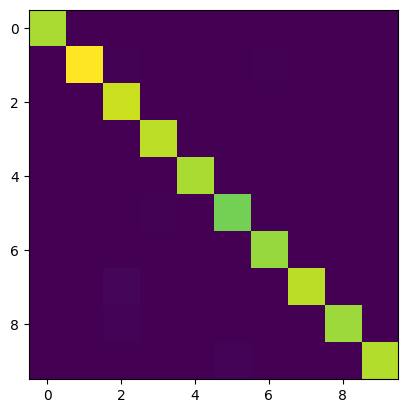

In [10]:
# plot confusion matrix
import sklearn.metrics

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(np.round(conf_norm, 3))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
9 => 5
[0.    0.    0.    0.    0.    0.565 0.    0.003 0.006 0.426]


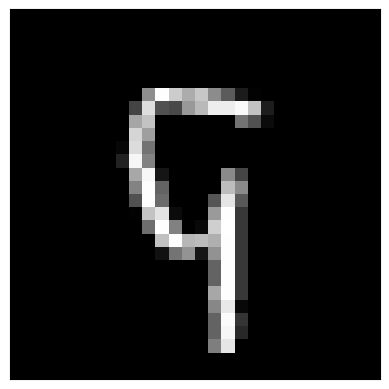

1 => 6
[0.    0.021 0.    0.    0.    0.    0.976 0.    0.003 0.   ]


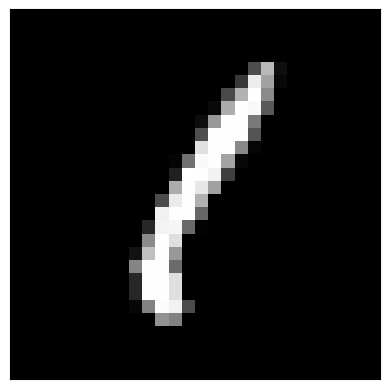

8 => 2
[0.    0.    0.866 0.004 0.    0.    0.    0.    0.13  0.   ]


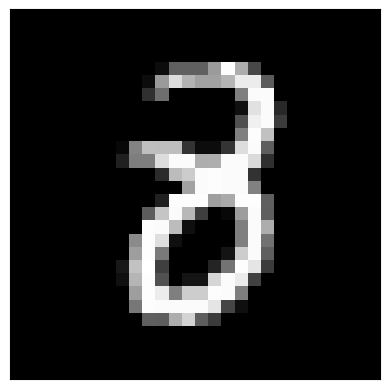

7 => 3
[0.    0.    0.    0.967 0.    0.    0.    0.032 0.    0.   ]


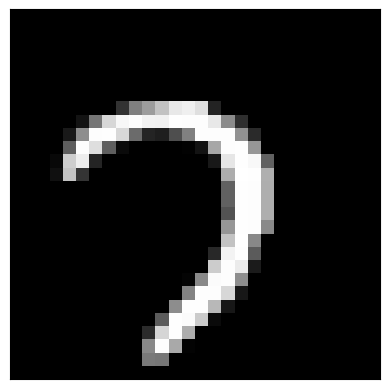

5 => 3
[0.    0.    0.    0.654 0.    0.346 0.    0.    0.    0.   ]


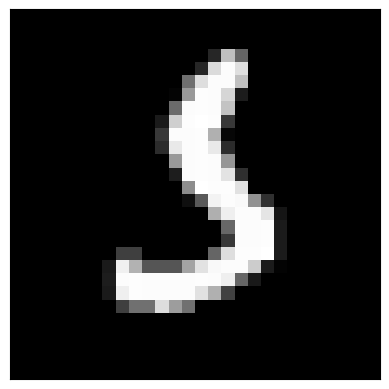

8 => 2
[0.013 0.    0.713 0.    0.    0.    0.    0.    0.274 0.   ]


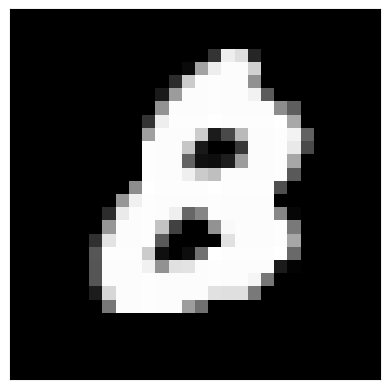

8 => 2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


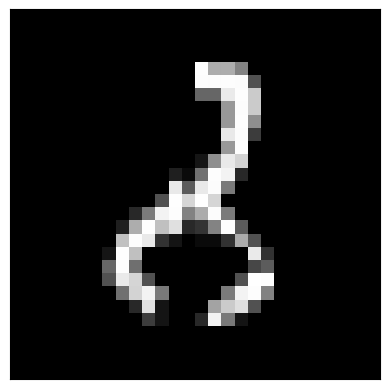

6 => 4
[0.    0.    0.    0.    0.659 0.    0.341 0.    0.    0.   ]


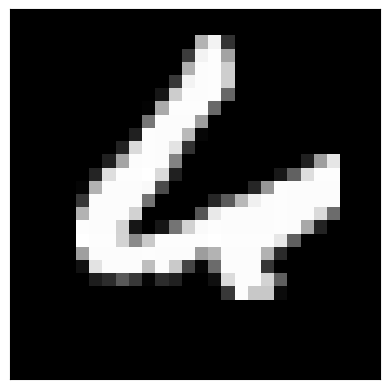

In [11]:
# show errors
y_pred = model.predict(x_test)

idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]

for i in idx[:8]:
  print('{} => {}'.format(np.argmax(y_test[i]), np.argmax(y_pred[i])))
  print(np.round(y_pred[i], 3))
  plt.figure()
  plt.imshow(x_test[i][..., 0], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

SAVE MODEL

In [12]:
#for save model
# model.save('model_checkpoint.keras')
#if you want to save model to your google drive
# !mv model_checkpoint.keras /content/drive/MyDrive

# Test Model

In [17]:
# for load model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/model_checkpoint.keras')

In [13]:
def predict_my_input(path , loaded_model):
  image = cv2.imread(path)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (28, 28))
  image = np.expand_dims(image, axis=2)
  image = np.expand_dims(image, axis=0)
  image = 255 - image
  image = image.astype(float) / 255
  p = loaded_model.predict(image)
  print(p)
  p=np.argmax(p)
  print(p)
  return (image,p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
[[1.07947308e-07 1.74416018e-05 3.42524275e-02 8.33542705e-01
  1.08657136e-04 6.86306919e-07 3.71025477e-09 1.18303947e-01
  5.19059067e-05 1.37221944e-02]]
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[4.7613192e-14 2.2139753e-13 1.7263904e-14 6.3568839e-09 8.9425564e-14
  9.9999833e-01 1.2555237e-11 1.8384911e-13 2.4208550e-12 1.6891158e-06]]
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.0584328e-09 4.9025312e-10 2.2944291e-06 9.9998927e-01 4.6688400e-09
  4.1422073e-08 7.2883487e-12 7.9728788e-06 8.2867855e-09 4.3407832e-07]]
3


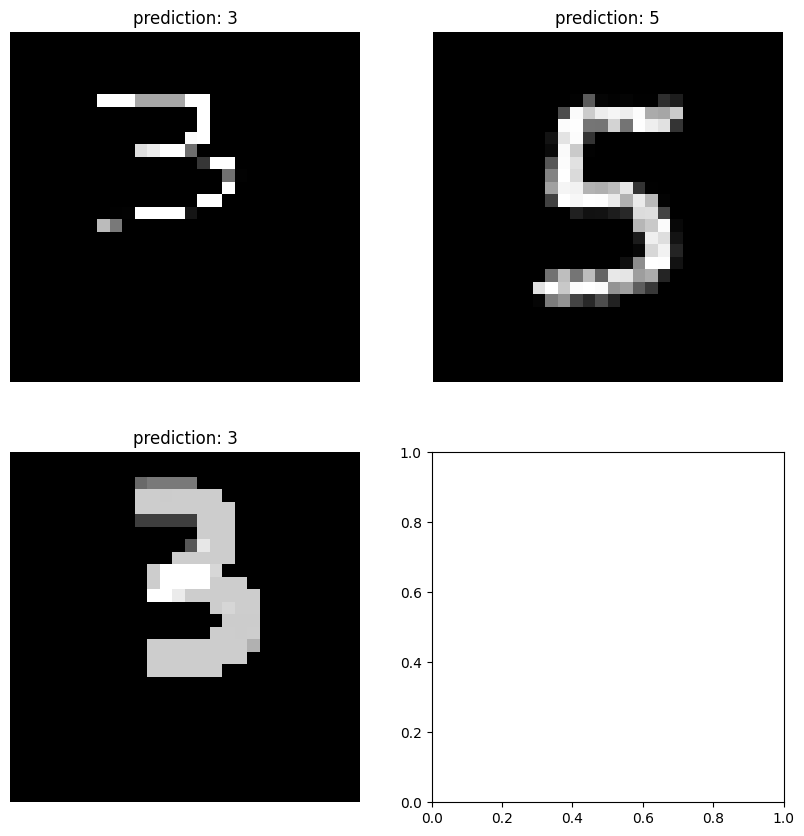

In [18]:
# plt.imshow(predict_my_input("2.png")[0, ..., 0], cmap='gray')
my_input_path = ['/content/3.png' , '/content/5.png' ,'/content/3_1.png' ]
images = []
results = []
for i in range(3):
  image , res = predict_my_input(my_input_path[i], model)
  images.append(image)
  results.append(res)
plt.subplots(2,2, figsize=(10,10))

for i in range(3):
  plt.subplot(2,2, i+1)
  plt.imshow(images[i][0, ..., 0], cmap='gray')
  plt.axis('off')
  plt.title(f"prediction: {results[i]}")